<a href="https://colab.research.google.com/github/Manu-Gr/Decision-Tree---Assignment---Fraud-Dataset/blob/main/Decision_Tree_Assignment2_Fraud_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Problem Statement:**
####Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

####Data Description :

####Undergrad : person is under graduated or not
####Marital.Status : marital status of a person
####Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
####Work Experience : Work experience of an individual person
####Urban : Whether that person belongs to urban area or not


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [ ]:
# import data 
Fraud = pd.read_csv('Fraud_check.csv')
Fraud


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
Fraud = Fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})
Fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
Fraud['Income_range'] = np.where(Fraud['Taxable_Income']>=30000, 'Good', 'Risky')
Fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [ ]:
Fraud_data = pd.get_dummies(Fraud.iloc[:,:6])
Fraud_data

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [ ]:
Fd= Fraud_data.drop(columns={'Taxable_Income'},axis=1)
Fd

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [ ]:
Fd1 = pd.concat([Fraud['Income_range'], Fd], axis=1)
Fd1

,Income_range,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [ ]:
# Normalization function - Method 1
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
Fd_norm = norm_func(Fd1.iloc[:,1:])
Fd_norm.tail(10)

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
590,0.341473,0.466667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
591,0.615406,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
592,0.283703,0.533333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
593,0.610256,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
594,0.412341,0.300000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
599,0.760683,0.533333,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#Method 2
Fd_norm1= normalize(Fd1.iloc[:,1:])
Fd_norm1

array([[9.99999979e-01, 1.99812172e-04, 1.99812172e-05, ...,
        1.99812172e-05, 0.00000000e+00, 1.99812172e-05],
       [9.99999991e-01, 1.34253215e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.45851196e-06],
       [9.99999982e-01, 1.87260070e-04, 6.24200232e-06, ...,
        0.00000000e+00, 0.00000000e+00, 6.24200232e-06],
       ...,
       [1.00000000e+00, 0.00000000e+00, 6.49106181e-06, ...,
        0.00000000e+00, 0.00000000e+00, 6.49106181e-06],
       [9.99999995e-01, 9.44009147e-05, 0.00000000e+00, ...,
        0.00000000e+00, 5.55299498e-06, 0.00000000e+00],
       [9.99999995e-01, 1.01178092e-04, 6.32363074e-06, ...,
        0.00000000e+00, 6.32363074e-06, 0.00000000e+00]])

In [ ]:
Fd_norm1=pd.DataFrame(Fd_norm1)
Fd_norm1

,0,1,2,3,4,5,6,7,8
0,1.000000,0.000200,0.000020,0.000000,0.000000,0.000000,0.000020,0.000000,0.000020
1,1.000000,0.000134,0.000000,0.000007,0.000007,0.000000,0.000000,0.000000,0.000007
2,1.000000,0.000187,0.000006,0.000000,0.000000,0.000006,0.000000,0.000000,0.000006
3,1.000000,0.000078,0.000000,0.000005,0.000000,0.000000,0.000005,0.000000,0.000005
4,0.999999,0.001017,0.000036,0.000000,0.000000,0.000036,0.000000,0.000036,0.000000
...,...,...,...,...,...,...,...,...,...
595,1.000000,0.000177,0.000000,0.000025,0.000025,0.000000,0.000000,0.000000,0.000025
596,1.000000,0.000036,0.000000,0.000018,0.000018,0.000000,0.000000,0.000000,0.000018
597,1.000000,0.000000,0.000006,0.000000,0.000006,0.000000,0.000000,0.000000,0.000006
598,1.000000,0.000094,0.000000,0.000006,0.000000,0.000006,0.000000,0.000006,0.000000


In [ ]:
Fd_norm2=pd.concat([Fd1['Income_range'], Fd_norm], axis=1)
Fd_norm2

,Income_range,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,Good,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Good,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,Good,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Good,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,Good,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,Good,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,Good,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,Good,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,Good,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x=Fd_norm2.iloc[:,1:]
y=Fd_norm2['Income_range']

In [ ]:
x

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income_range, Length: 600, dtype: object

In [ ]:
X = Fd1.iloc[:,1:]
X

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [ ]:
Y=Fd1['Income_range']
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income_range, Length: 600, dtype: object

In [ ]:
colnames = list(x.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
# Splitting data into training and testing data set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=2)

###**Model Building**

### **Building Decision Tree Classifier using Entropy Criteria**

###**Model 1**

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

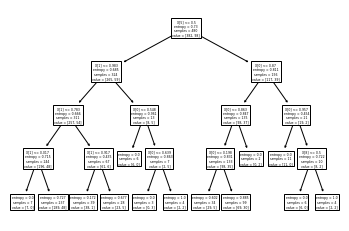

In [ ]:
#PLot the decision tree
tree.plot_tree(model);


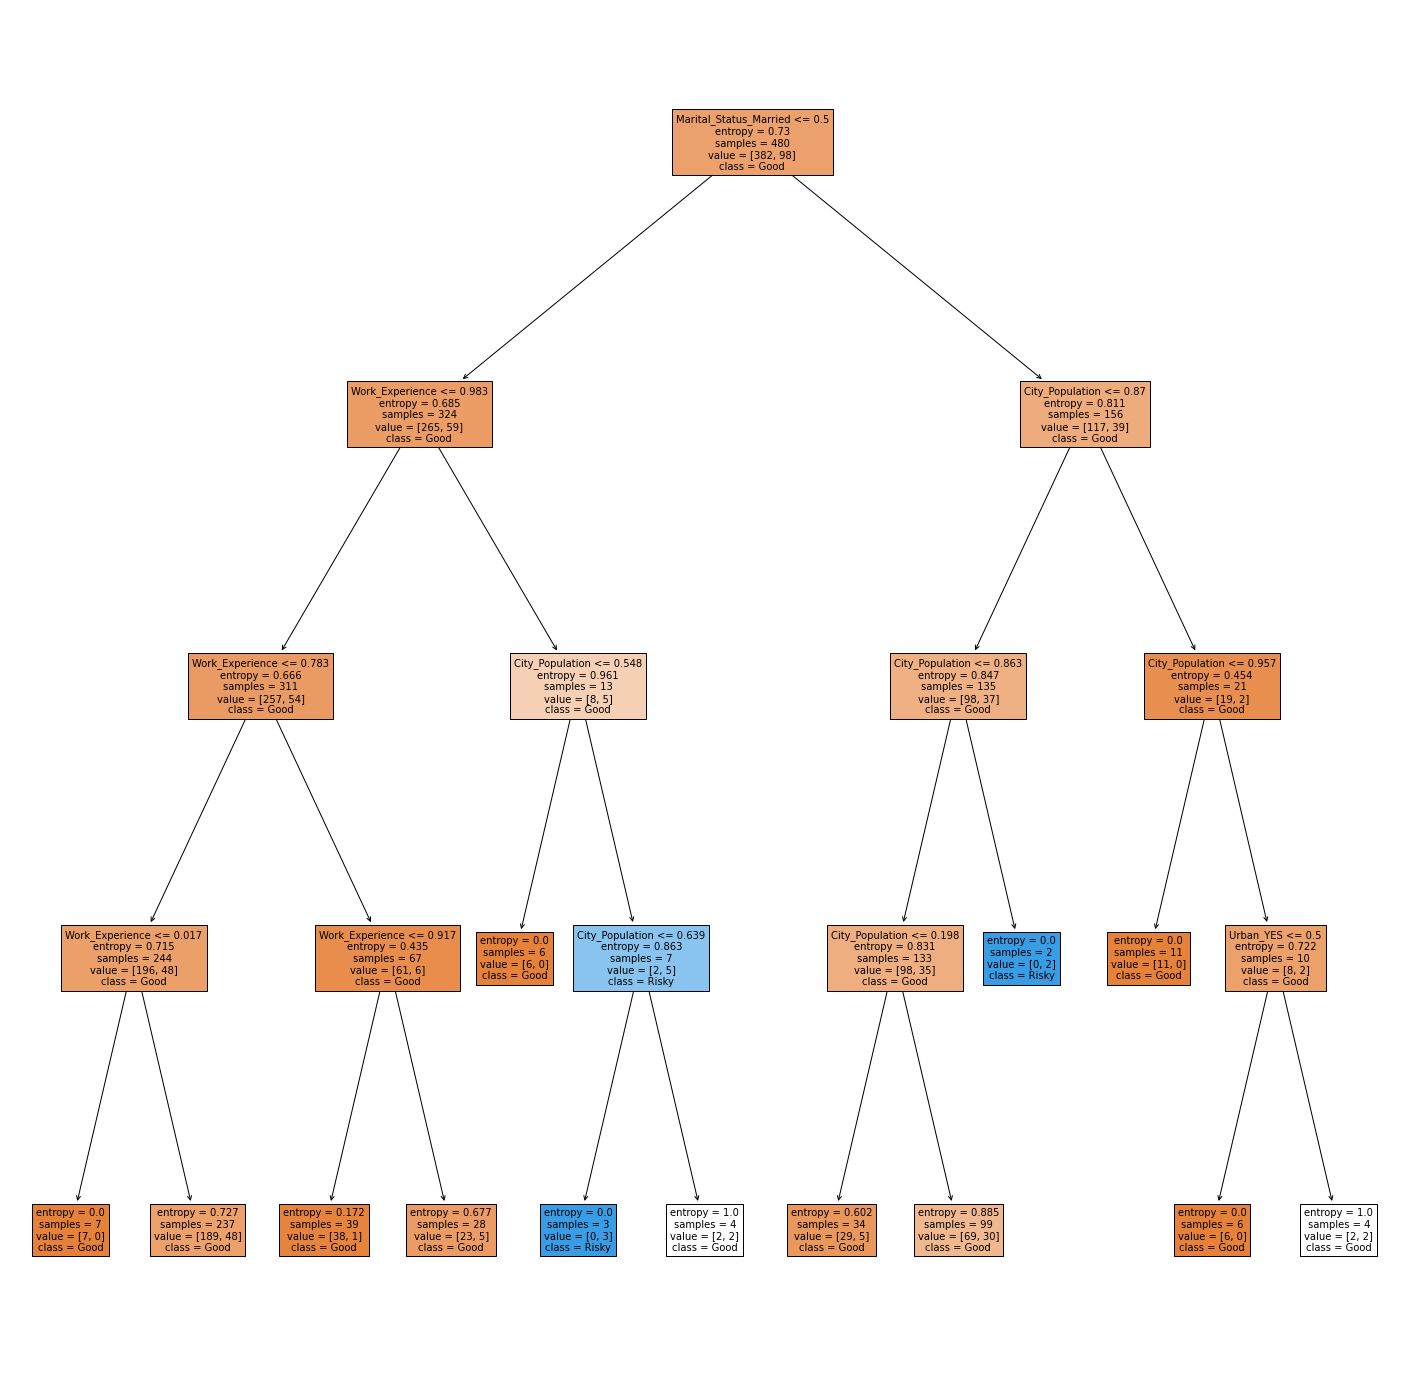

In [ ]:
fig, axes = plt.subplots(figsize = (25,25))
fn=['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES']
cn=['Good','Risky']

tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True,
               fontsize=10);

###**Model 2**

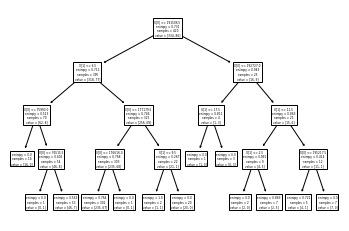

In [ ]:
#PLot the decision tree
tree.plot_tree(model2);


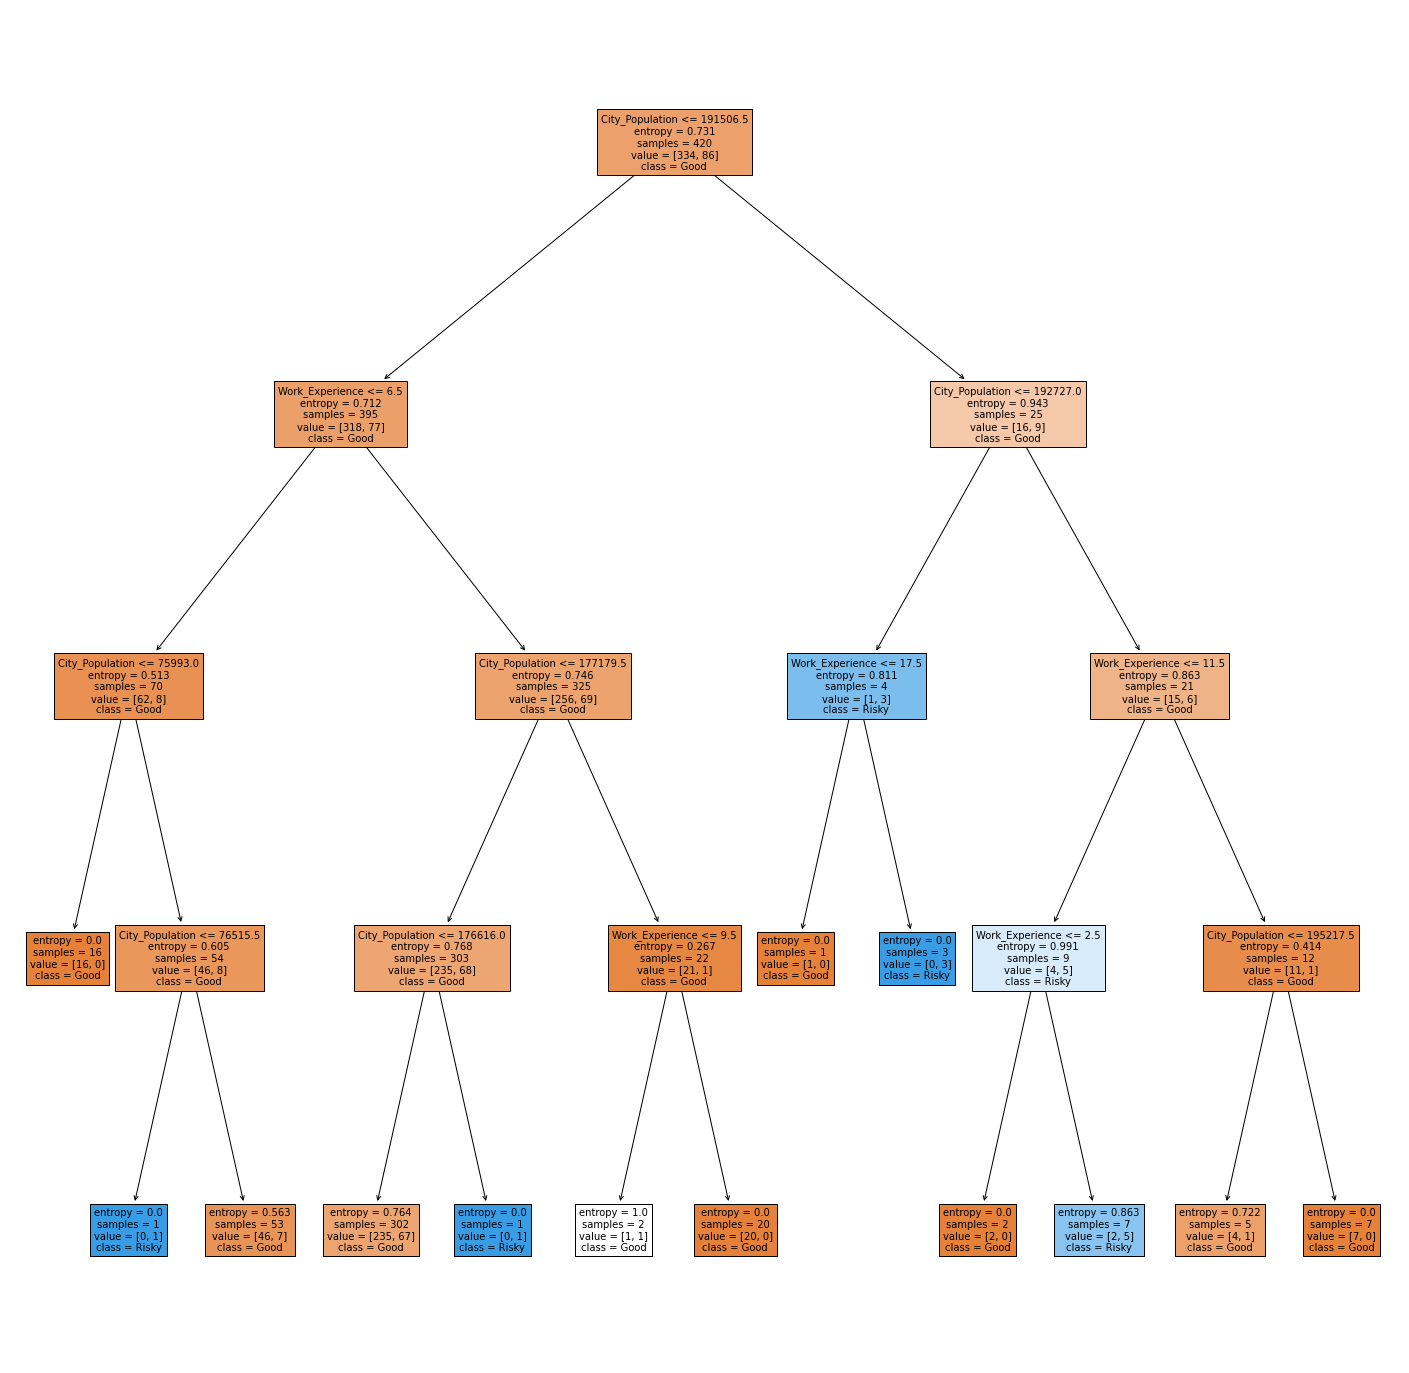

In [ ]:
fig, axes = plt.subplots(figsize = (25,25))
fn=['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES']
cn=['Good','Risky']

tree.plot_tree(model2,
               feature_names = fn,
               class_names=cn,
               filled = True,
               fontsize=10);

###**Model Validation and Testing**


In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good    120
dtype: int64

In [ ]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [ ]:
y_test

110    Risky
419     Good
565     Good
77      Good
181    Risky
       ...  
399     Good
340     Good
148     Good
494     Good
439    Risky
Name: Income_range, Length: 120, dtype: object

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
Income_range,
Good,94
Risky,26


In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.7833333333333333

In [ ]:
#Predicting on test data
preds2 = model2.predict(X_test) # predicting on test data set 
pd.Series(preds2).value_counts() # getting the count of each category 

Good     179
Risky      1
dtype: int64

In [ ]:
preds2

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [ ]:
Y_test

449     Good
141     Good
131     Good
311     Good
176     Good
       ...  
548     Good
15      Good
465    Risky
307     Good
322     Good
Name: Income_range, Length: 180, dtype: object

In [ ]:
pd.crosstab(Y_test,preds2) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Income_range,,
Good,141,1
Risky,38,0


In [ ]:
# Accuracy 
np.mean(preds2==Y_test)

0.7833333333333333

## **Building Decision Tree Classifier (CART) using Gini Criteria**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds2==Y_test)

0.7833333333333333

### **Bagging**

In [ ]:
# Bagged Decision Trees for Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:

seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100


In [ ]:
Bagging_model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
Bagging_model.fit(X_train,Y_train)
results = cross_val_score(Bagging_model, X_train, Y_train, cv=kfold)


In [ ]:
print(results.mean())

0.7452380952380953


In [ ]:
Bagging_preds = Bagging_model.predict(X_test)


In [ ]:
pd.crosstab(Y_test,Bagging_preds)

col_0,Good,Risky
Income_range,,
Good,132,10
Risky,38,0


In [ ]:
# Accuracy 
np.mean(Bagging_preds==Y_test)

0.7333333333333333

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(X_train,Y_train)

RandomForestClassifier(max_features=3)

In [ ]:
Random_forest_results = cross_val_score(Random_forest_model, X_train, Y_train, cv=kfold)
print(Random_forest_results.mean())

0.7333333333333333


In [ ]:
Random_forest_preds = Random_forest_model.predict(X_test)
pd.crosstab(Y_test,Random_forest_preds)

col_0,Good,Risky
Income_range,,
Good,133,9
Risky,37,1


In [ ]:
# Accuracy 
np.mean(Random_forest_preds==Y_test)

0.7444444444444445

### **ADAPTIVE BOOSTING (ADABOOST)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
AdaBoost_model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
AdaBoost_model.fit(X_train,Y_train)


AdaBoostClassifier(n_estimators=10, random_state=7)

In [ ]:
AdaBoost_results = cross_val_score(AdaBoost_model, X_train, Y_train, cv=kfold)
print(AdaBoost_results.mean())

0.7833333333333333


In [ ]:
AdaBoost_preds = AdaBoost_model.predict(X_test)
pd.crosstab(Y_test,AdaBoost_preds)

col_0,Good
Income_range,
Good,142
Risky,38


In [ ]:
# Accuracy 
np.mean(Random_forest_preds==Y_test)

0.7444444444444445